In [1]:
import numpy as np                # import numpy arrays and do math
import pandas as pd               # imports pandas library to process and visualize data better with tables
import matplotlib.pyplot as plt          # visualize the training for machine learning/AI
from sklearn.datasets import load_breast_cancer           # importing the data set (over 500 data sets about tumor measurements/features)
from sklearn.model_selection import train_test_split       # to split data into training data
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

# Adding the "target" column to the data frame
data_frame['label'] = breast_cancer_dataset.target

X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standardize the data
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)

# Setting up the layers of the Neural Network
model = Sequential([
    Input(shape=(30,)),
    Dense(256, activation='relu'),        # Increased number of neurons
    Dropout(0.3),                         # Dropout to reduce overfitting
    Dense(128, activation='relu'),        # Further hidden layer
    Dropout(0.3),                         # Dropout to prevent overfitting
    Dense(64, activation='relu'),         # Additional hidden layer
    Dense(2, activation='softmax')        # Output layer
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for better convergence
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for reducing learning rate and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Training the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=150, batch_size=32, callbacks=[reduce_lr, early_stopping])


Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.6930 - loss: 0.6290 - val_accuracy: 0.9783 - val_loss: 0.5373 - learning_rate: 1.0000e-04
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8403 - loss: 0.5515 - val_accuracy: 0.9783 - val_loss: 0.4543 - learning_rate: 1.0000e-04
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9248 - loss: 0.4681 - val_accuracy: 0.9783 - val_loss: 0.3838 - learning_rate: 1.0000e-04
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8986 - loss: 0.4030 - val_accuracy: 0.9783 - val_loss: 0.3237 - learning_rate: 1.0000e-04
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9214 - loss: 0.3590 - val_accuracy: 0.9783 - val_loss: 0.2714 - learning_rate: 1.0000e-04
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9306 - loss: 0.3058 - val_accuracy: 0.9783 - val_loss: 0.2304 - learning_rate: 1.0000e-04
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9770 - loss: 0.0882  
Test Accuracy: 0.97, Test Loss: 0.09


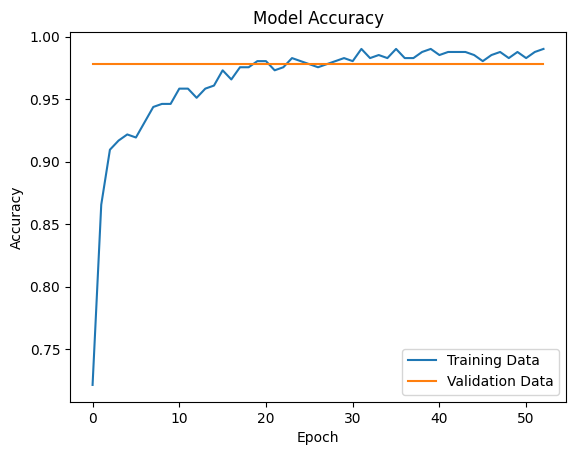

In [3]:
# Accuracy of the model on the test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {accuracy:.2f}, Test Loss: {loss:.2f}")

# Visualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9770 - loss: 0.0882 
Test Accuracy: 0.97, Test Loss: 0.09


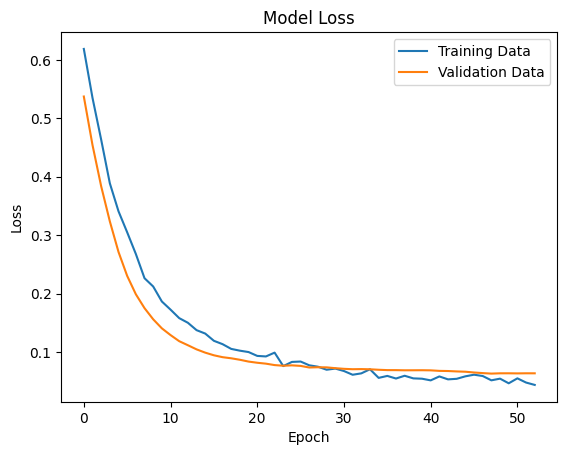

In [5]:
# Accuracy of the model on the test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {accuracy:.2f}, Test Loss: {loss:.2f}")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')

In [ ]:
# Predicting whether a tumor is benign or malignant
input_data = np.asarray(input("Enter tumor features separated by commas: ").split(','), dtype=float).reshape(1, -1)
input_data_std = scalar.transform(input_data)

prediction = model.predict(input_data_std)
prediction_label = np.argmax(prediction)

if prediction_label == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')